In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load data
HD_data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
HD_data = HD_data.astype(int)
HD_data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [3]:
# Check for missing values
print(HD_data.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [4]:
# Correctly create 'Diabetes_Combined' before using it
HD_data['Diabetes'] = np.where(HD_data['Diabetes'].isin([1, 2]), 1, 0)



# Combine columns with correct referencing
HD_data['Combined'] = HD_data['Stroke'].astype(str) + '_' + HD_data['HeartDiseaseorAttack'].astype(str) + '_' + HD_data['Diabetes'].astype(str)

# Viewing the tail of DataFrame
print(HD_data.tail())

# Printing column names
print(HD_data.columns)

# Map numerical columns to categorical labels
categorical_mappings = {
    'HighBP': {0: 'No', 1: 'Yes'},
    'HighChol': {0: 'No', 1: 'Yes'},
    'CholCheck': {0: 'No', 1: 'Yes'},
    'Smoker': {0: 'No', 1: 'Yes'},
    'PhysActivity': {0: 'No', 1: 'Yes'},
    'Fruits': {0: 'No', 1: 'Yes'},
    'Veggies': {0: 'No', 1: 'Yes'},
    'HvyAlcoholConsump': {0: 'No', 1: 'Yes'},
    'AnyHealthcare': {0: 'No', 1: 'Yes'},
    'NoDocbcCost': {0: 'No', 1: 'Yes'},
    'DiffWalk': {0: 'No', 1: 'Yes'},
    'Sex': {0: 'Male', 1: 'Female'}
}

# Create contingency tables
def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_percentage_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
253675                     0       1         1          1   45       0   
253676                     0       1         1          1   18       0   
253677                     0       0         0          1   28       0   
253678                     0       1         0          1   23       0   
253679                     1       1         1          1   25       0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
253675       0         0             0       1  ...            0        3   
253676       0         1             0       0  ...            0        4   
253677       0         0             1       1  ...            0        1   
253678       0         0             0       1  ...            0        3   
253679       0         1             1       1  ...            0        2   

        MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  Combined  
253675        

In [5]:
max(HD_data["PhysHlth"])
min(HD_data["PhysHlth"])


"""
Low PhysHlth: 0-10
Mid PhysHlth: 11 - 20 
High PhysHlth: 21 - 30 

"""
bins = [0, 10, 20, float('inf')]  
labels = ['Low PhysHlth', 'Mid PhysHlth', 'High PhysHlth']


HD_data["PhysHlth_category"] = pd.cut(HD_data['PhysHlth'], bins=bins, labels=labels, right=False)

print(HD_data['PhysHlth_category'])

0          Mid PhysHlth
1          Low PhysHlth
2         High PhysHlth
3          Low PhysHlth
4          Low PhysHlth
              ...      
253675     Low PhysHlth
253676     Low PhysHlth
253677     Low PhysHlth
253678     Low PhysHlth
253679     Low PhysHlth
Name: PhysHlth_category, Length: 253680, dtype: category
Categories (3, object): ['Low PhysHlth' < 'Mid PhysHlth' < 'High PhysHlth']


In [6]:
# Dropdown for selecting the variable to compare against 'Combined'
compare_dropdown = widgets.Dropdown(
    options=list(categorical_mappings.keys()),
    description='Compare With:'
)

def update_plot(compare_with):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=HD_data, x='Combined', hue=compare_with, palette='viridis')
    plt.title(f"Distribution of Disease Combinations by {compare_with}")
    plt.xlabel("Disease Combination")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Display interactive controls
widgets.interactive(update_plot, compare_with=compare_dropdown)

interactive(children=(Dropdown(description='Compare With:', options=('HighBP', 'HighChol', 'CholCheck', 'Smoke…

In [7]:
HD_data_filter = HD_data[HD_data["Combined"] != "0_0_0"]

In [8]:
# Age division -> 3 groups = 18 - 35: Young Adult -> 36 - 65: Adult -> 65+ Senior
# Create dropdown widget


# Now you can proceed with defining your dropdown widget and other interactive elements

category_dropdown = widgets.Dropdown(
    options=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
             'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HighBP', 'HighChol', 'CholCheck', 'Sm…

In [66]:
print(max(HD_data["BMI"]))
print(min(HD_data["BMI"]))
'''
Underweight: BMI less than 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obesity: BMI 30 to 40
Severe obesity: BMI over 40
'''

#HD_data["BMI"]

#import pandas as pd


# Define the bins and labels for BMI categories
bins = [0, 19, 25, 30, 40, float('inf')]  # BMI category boundaries
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Severe obesity']  # BMI category labels

# Divide BMI values into categories
HD_data['BMI_category'] = pd.cut(HD_data['BMI'], bins=bins, labels=labels, right=False)

print(HD_data)

98
12
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
0                          0       1         1          1   40       1   
1                          0       0         0          0   25       1   
2                          0       1         1          1   28       0   
3                          0       1         0          1   27       0   
4                          0       1         1          1   24       0   
...                      ...     ...       ...        ...  ...     ...   
253675                     0       1         1          1   45       0   
253676                     0       1         1          1   18       0   
253677                     0       0         0          1   28       0   
253678                     0       1         0          1   23       0   
253679                     1       1         1          1   25       0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  Sex  Age  Education  \
0            0         0     

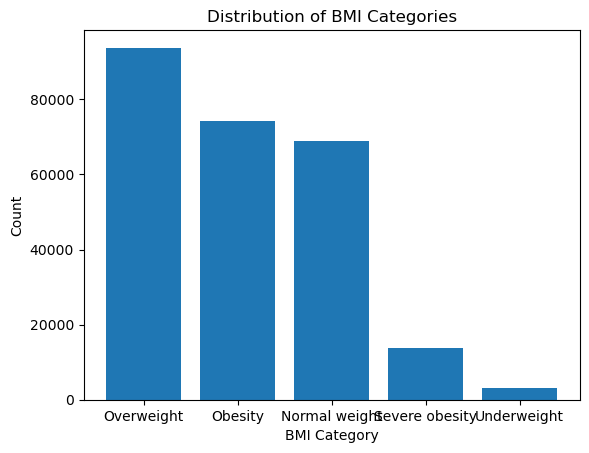

In [68]:
import matplotlib.pyplot as plt
category_counts = HD_data["BMI_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')
plt.show()

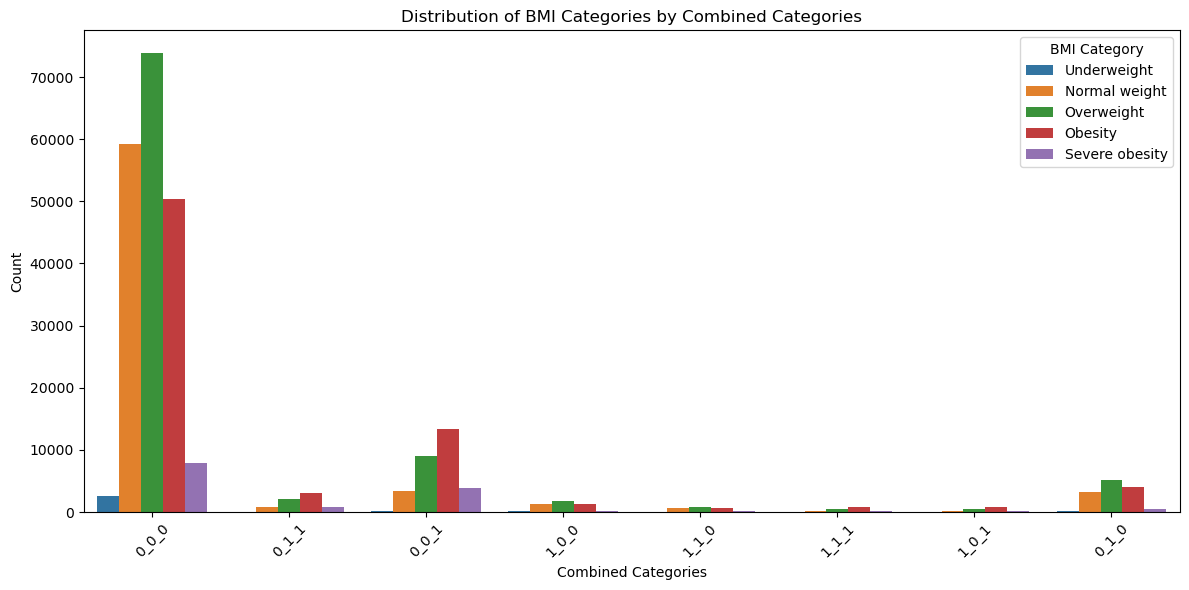

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='BMI_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories by Combined Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='BMI Category')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [72]:
#print(max(HD_data["MentHlth"]))
#print(min(HD_data["MentHlth"]))


"""
Will divide into 3 groups
Low Mental Health: 0 - 10 
Mid Mental Health: 11 - 20
High Mental Health: 21 - 30 
"""

bins = [0, 10, 20, float('inf')]  
labels = ['Low Mental Health', 'Mid Mental Health', 'High Mental Health']  


HD_data['MentHlth_category'] = pd.cut(HD_data['MentHlth'], bins=bins, labels=labels, right=False)

print(HD_data['MentHlth_category'])

0          Mid Mental Health
1          Low Mental Health
2         High Mental Health
3          Low Mental Health
4          Low Mental Health
                 ...        
253675     Low Mental Health
253676     Low Mental Health
253677     Low Mental Health
253678     Low Mental Health
253679     Low Mental Health
Name: MentHlth_category, Length: 253680, dtype: category
Categories (3, object): ['Low Mental Health' < 'Mid Mental Health' < 'High Mental Health']


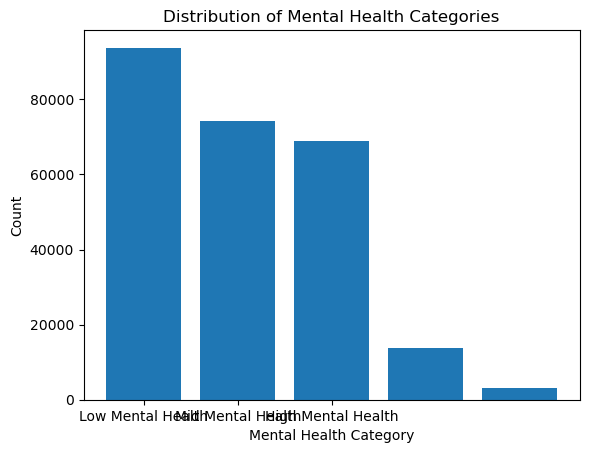

In [74]:
plt.bar(range(len(category_counts)), category_counts.values)
plt.xlabel('Mental Health Category')
plt.ylabel('Count')
plt.title('Distribution of Mental Health Categories')

plt.xticks(range(len(labels)), labels)

plt.show()

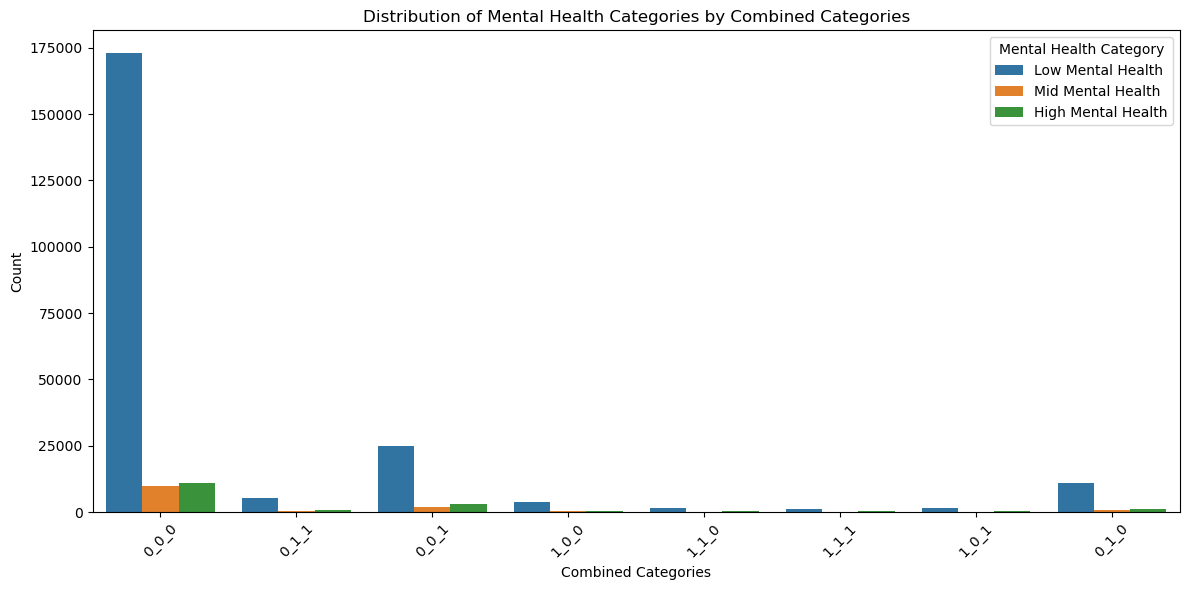

In [14]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='MentHlth_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Mental Health Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Mental Health Category')
plt.tight_layout() 
plt.show()

In [15]:
print(max(HD_data["Age"]))
print(min(HD_data["Age"]))

'''
Age division -> 3 groups 
Young Adult: 18 - 35 : 1 - 5
Adult -> 36 - 65 5 - 9
Elder -> 65+ Senior 10 - 13

'''

bins = [1, 5, 10, float('inf')]  
labels = ['Young Adult', 'Adult', 'Elder']  


HD_data['Age_category'] = pd.cut(HD_data['Age'], bins=bins, labels=labels, right=False)

print(HD_data['Age_category'])

13
1
0               Adult
1               Adult
2               Adult
3               Elder
4               Elder
             ...     
253675          Adult
253676          Elder
253677    Young Adult
253678          Adult
253679          Adult
Name: Age_category, Length: 253680, dtype: category
Categories (3, object): ['Young Adult' < 'Adult' < 'Elder']


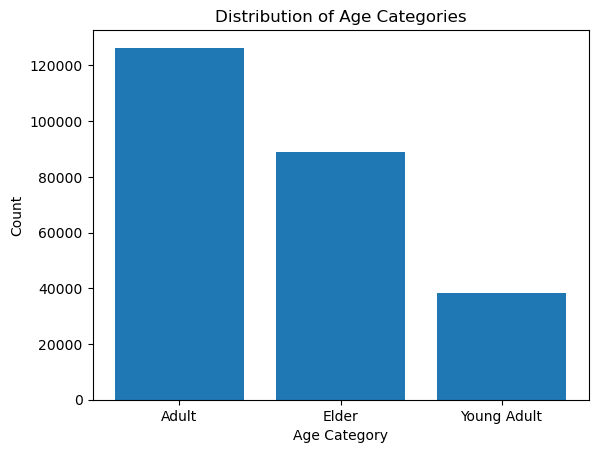

In [16]:
category_counts = HD_data["Age_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.show()

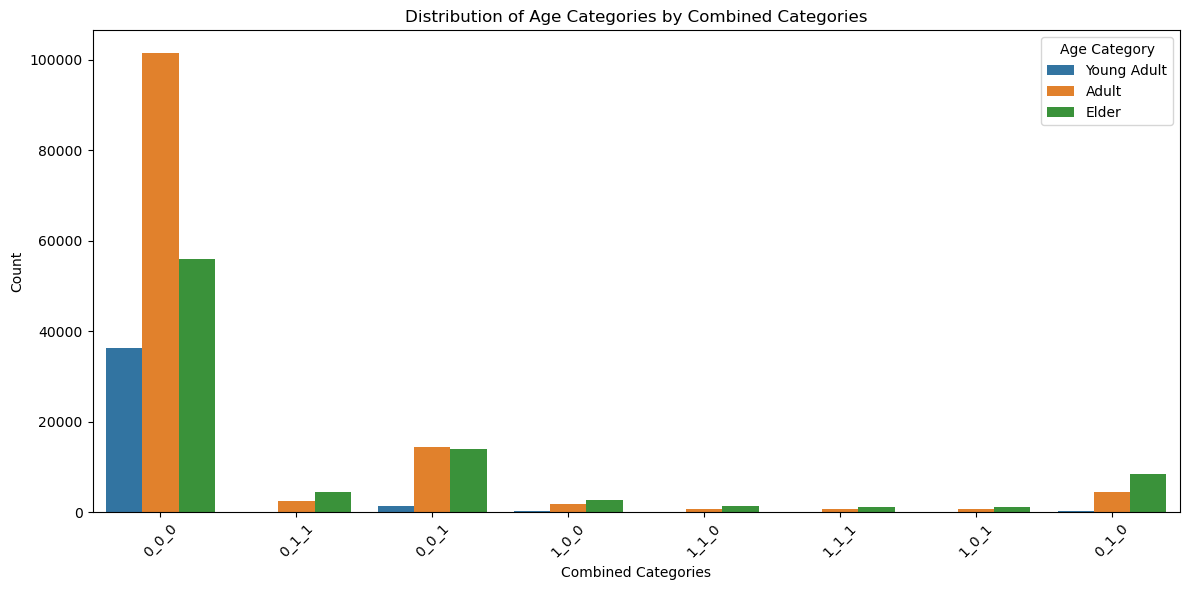

In [17]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Age_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Age Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Age Category')
plt.tight_layout() 
plt.show()

In [18]:
max(HD_data["Income"])
#min(HD_data["Income"])


"""
Divide into 3 groups

Low Income: 1 - 3
Mid Income: 4 - 6
High Income: 7 - 8 

"""


bins = [1, 3, 6, float('inf')]  
labels = ['Low Income', 'Mid Income', 'High Income']  


HD_data['Income_category'] = pd.cut(HD_data['Income'], bins=bins, labels=labels, right=False)

print(HD_data['Income_category'])

0          Mid Income
1          Low Income
2         High Income
3         High Income
4          Mid Income
             ...     
253675    High Income
253676     Mid Income
253677     Low Income
253678     Low Income
253679     Low Income
Name: Income_category, Length: 253680, dtype: category
Categories (3, object): ['Low Income' < 'Mid Income' < 'High Income']


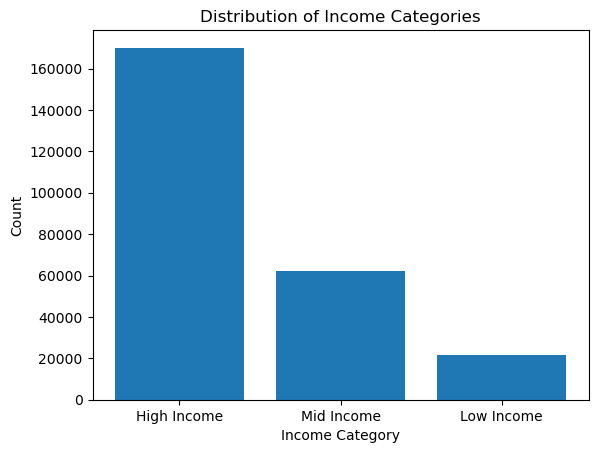

In [19]:
# Maybe redo this group!

category_counts = HD_data["Income_category"].value_counts()


'''
plt.bar(range(len(category_counts)), category_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')

plt.xticks(range(len(labels)), labels)

plt.show()

'''

#category_counts = HD_data["Age_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')
plt.show()

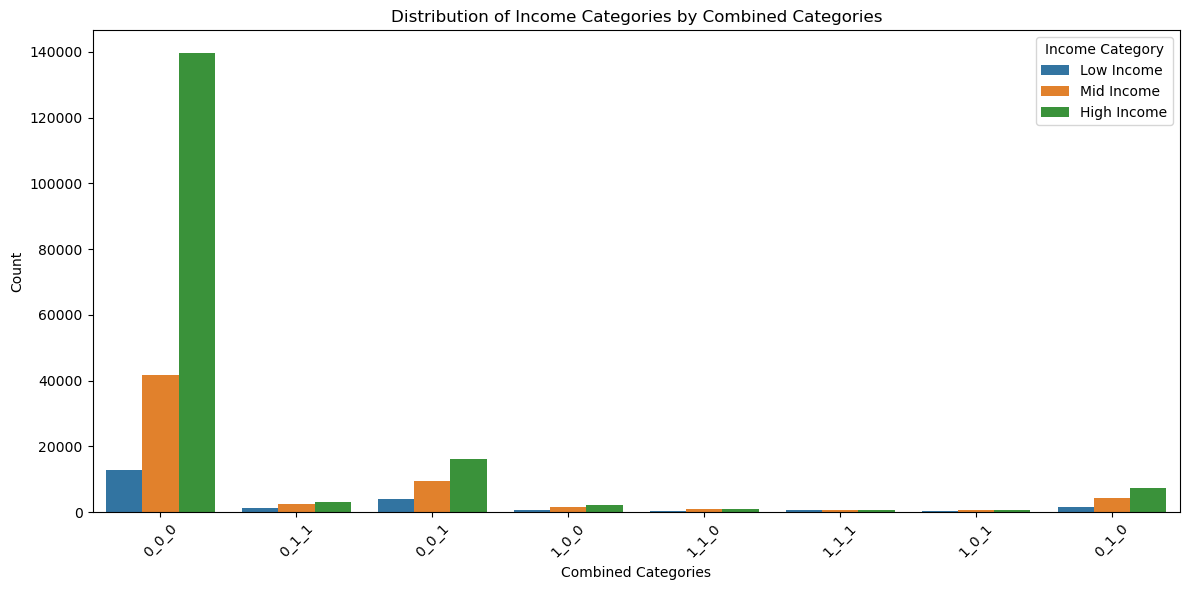

In [20]:
# This iS VERY INTERESTING!! Mostly all of the high income have nothing wrong with them>>>>>>!

plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Income_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Income Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Income Category')
plt.tight_layout() 
plt.show()

In [21]:
HD_data_filter = HD_data[HD_data["Combined"] != "0_0_0"]

In [22]:
# Define a function that creates the plot based on the selected variable
def plot_data(column):
    # plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.countplot(x='Combined', hue=column, data=HD_data, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend(title=column, loc='upper right')
    plt.show()

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data.columns if col != 'Combined']
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)
##########################This is after the taking out the 0_0_0, 
# Define a function that creates the plot based on the selected variable
def plot_data(column):
    # plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.countplot(x='Combined', hue=column, data=HD_data_filter, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend(title=column, loc='upper right')
    plt.show()

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data_filter.columns if col != 'Combined']
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

<function __main__.plot_data(column)>

- We are excluding original BMI variable, and we'll be using the BMI_category (which we have categorized for BMI) to further analyze it.
- People who have low mental health tend to have diabetes
- Adults tend to significantly have higher chances to have diabetes.
- Elders tend to have higher chance of getting diabetes, heart diseases, and stroke.

In [24]:
# Assuming 'HD_data' is your DataFrame and 'HeartDiseaseorAttack' is the target variable
features = HD_data.drop('HeartDiseaseorAttack', axis=1)  # Drop the target to isolate features
target = HD_data['HeartDiseaseorAttack']

# Calculate Mutual Information
mi_scores = mutual_info_classif(features, target, discrete_features=True)

# Create a Series for easier plotting
mi_scores_series = pd.Series(mi_scores, index=features.columns)
mi_scores_series = mi_scores_series.sort_values(ascending=False)


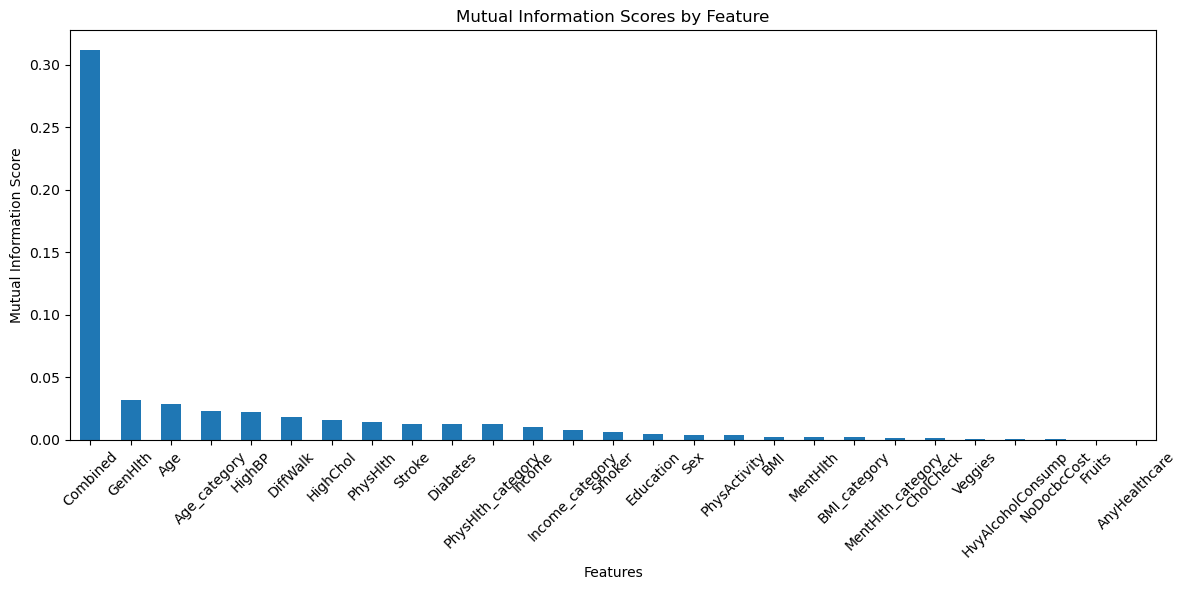

In [25]:
# Plotting
plt.figure(figsize=(12, 6))
mi_scores_series.plot(kind='bar')
plt.title('Mutual Information Scores by Feature')
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


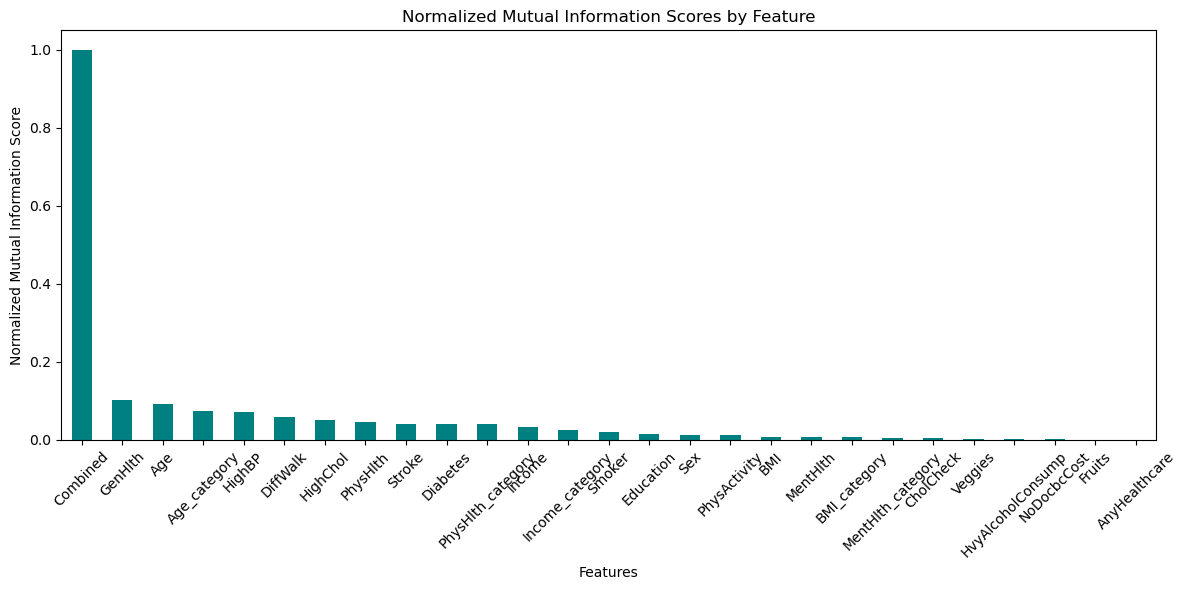

In [26]:
# Normalize the MI scores
mi_scores_normalized = mi_scores_series / mi_scores_series.max()

# Plotting normalized scores
plt.figure(figsize=(12, 6))
mi_scores_normalized.plot(kind='bar', color='teal')
plt.title('Normalized Mutual Information Scores by Feature')
plt.ylabel('Normalized Mutual Information Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
def calculate_entropy(data, var):
    # Replace with your actual entropy calculation
    probabilities = data[var].value_counts(normalize=True)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy
def scale_entropy(data, variables):
    entropy_values = {var: calculate_entropy(data, var) for var in variables}
    max_entropy = max(entropy_values.values()) if entropy_values else 1  # Avoid division by zero
    scaled_entropy = {k: v / max_entropy for k, v in entropy_values.items()}
    return scaled_entropy
# Function to update plot based on age and BMI category
def update_plot(age_category, bmi_category):
    filtered_data = HD_data[(HD_data['Age_category'] == age_category) & (HD_data['BMI_category'] == bmi_category)]
    scaled_entropy_values = scale_entropy(filtered_data, categories)
    
    # Sort entropy values for better visualization
    sorted_entropy_values = {k: v for k, v in sorted(scaled_entropy_values.items(), key=lambda item: item[1], reverse=True)}
    
    plt.figure(figsize=(10, 8))
    plt.barh(list(sorted_entropy_values.keys()), list(sorted_entropy_values.values()), color='lightgreen')
    plt.xlabel('Scaled Entropy')
    plt.title(f'Scaled Entropy of Health Indicators for {age_category}/{bmi_category}')
    plt.gca().invert_yaxis()  # Highest at top
    plt.show()

# Dropdowns for selecting the age and BMI category
age_dropdown = widgets.Dropdown(
    options=['Young Adult', 'Adult', 'Elder'],
    value='Adult',
    description='Select Age Group:',
    disabled=False,
)

bmi_dropdown = widgets.Dropdown(
    options=['Underweight', 'Normal weight', 'Overweight', 'Obesity'],
    value='Obesity',
    description='Select BMI Category:',
    disabled=False,
)

# Interactive widget to update the plot based on selections
widgets.interactive(update_plot, age_category=age_dropdown, bmi_category=bmi_dropdown)

interactive(children=(Dropdown(description='Select Age Group:', index=1, options=('Young Adult', 'Adult', 'Eld…

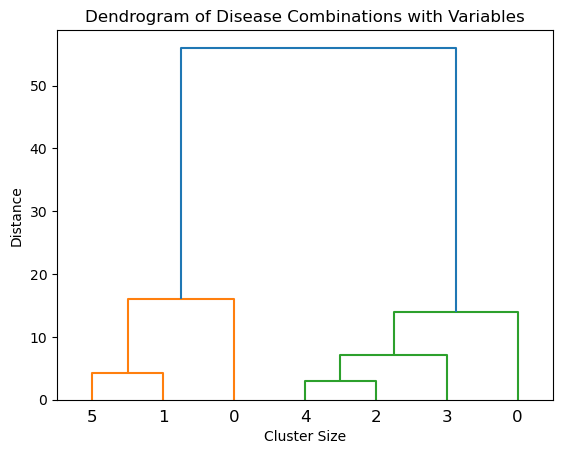

In [28]:
data = {
    'Disease_Combined': ['0_0_0', '0_0_1', '0_1_1', '1_1_1', '0_0_0', '1_0_1', '1_1_0'],
    'HighBP': np.random.randint(0, 2, size=7),
    'HighChol': np.random.randint(0, 2, size=7),
    'Age': np.random.randint(18, 80, size=7)  # Random ages between 18 and 80
}
df = pd.DataFrame(data)

# Encode 'Disease_Combined' into numerical categories if it isn't already
df['Disease_Combined'] = pd.Categorical(df['Disease_Combined']).codes

# Use linkage to perform clustering
linked = linkage(df, method='ward')

# Plotting the dendrogram
# plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df['Disease_Combined'].astype(str).values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram of Disease Combinations with Variables')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [29]:
len(HD_data['Age'])


253680

In [30]:
len(HD_data['Age_category'])

253680

In [31]:
# Assume HD_data is already loaded and contains 'Age_category' and 'Combined'
# Count the occurrence of each disease combination within each age category
disease_counts = HD_data.groupby(['Age_category', 'Combined']).size().unstack(fill_value=0)

# Calculate percentages within each age category
disease_percentages = disease_counts.div(disease_counts.sum(axis=1), axis=0) * 100

# Check the transformed data
print(disease_percentages.head())

Combined          0_0_0      0_0_1     0_1_0     0_1_1     1_0_0     1_0_1  \
Age_category                                                                 
Young Adult   94.882857   3.540425  0.739985  0.130739  0.460203  0.065370   
Adult         80.307994  11.308422  3.486697  1.875504  1.391988  0.582435   
Elder         62.898844  15.712361  9.500393  4.923094  2.945998  1.162007   

Combined         1_1_0     1_1_1  
Age_category                      
Young Adult   0.133354  0.047066  
Adult         0.551572  0.495386  
Elder         1.630179  1.227125  


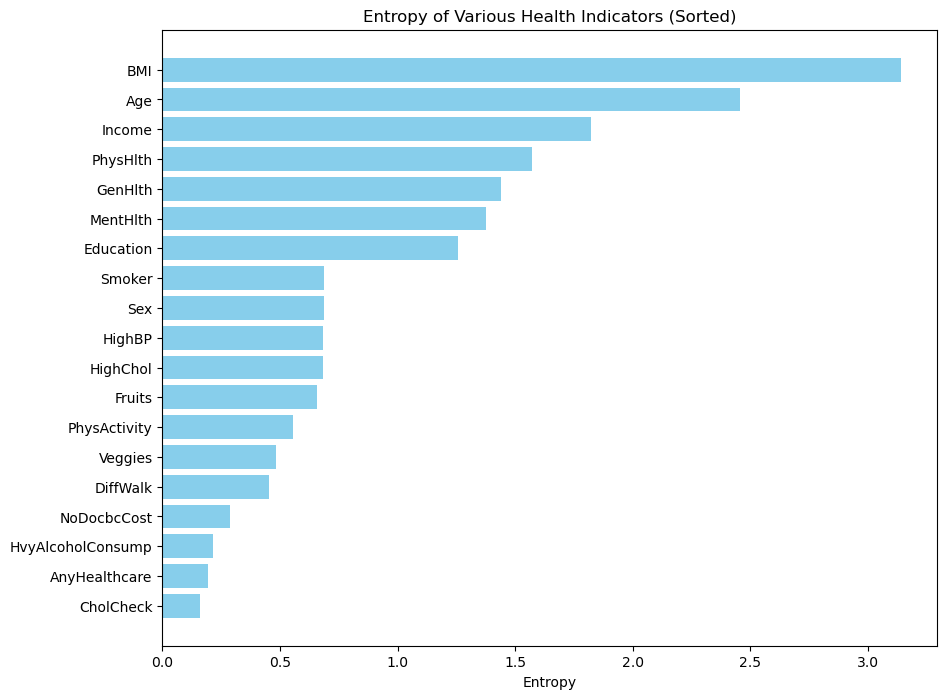

In [76]:
# Assuming the HD_data dataframe is already loaded with the correct data and columns

# List of all columns that are predictors in the dataset
categories = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity', 
              'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
              'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Function to calculate entropy for a variable
def calculate_entropy(data, variable):
    counts = data[variable].value_counts(normalize=True, sort=False)
    return entropy(counts, base=np.e)

# Calculate entropy for all variables
entropy_values = {var: calculate_entropy(HD_data, var) for var in categories}

# Sort the entropy values from highest to lowest before plotting
sorted_entropy_values = {k: v for k, v in sorted(entropy_values.items(), key=lambda item: item[1], reverse=True)}

# Plotting the sorted entropies
plt.figure(figsize=(10, 8))
plt.barh(list(sorted_entropy_values.keys()), list(sorted_entropy_values.values()), color='skyblue')
plt.xlabel('Entropy')
plt.title('Entropy of Various Health Indicators (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

In [78]:

# Update categorization functions to ensure they are correctly applied
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 40:
        return 'Obesity'
    else:
        return 'Severe obesity'

def categorize_age(age):
    if 1 <= age <= 5:
        return 'Young Adult'
    elif 6 <= age <= 9:
        return 'Middle Age'
    elif 10 <= age <= 13:
        return 'Elder'
    else:
        return 'Unknown'

HD_data['BMI_Category'] = HD_data['BMI'].apply(categorize_bmi)
HD_data['Age_Category'] = HD_data['Age'].apply(categorize_age)

categories = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
              'DiffWalk', 'Sex', 'Education', 'Income', 'BMI_Category', 'Age_Category']

def calculate_entropy(data, variable):
    counts = data[variable].value_counts(normalize=True, sort=False)
    return entropy(counts, base=np.e) if not counts.empty else 0

entropy_values = {var: calculate_entropy(HD_data, var) for var in categories}

def plot_compared_entropy(bmi_cat, age_cat):
    plt.figure(figsize=(12, 8))

    # Calculate the proportion of each category in the entire dataset for BMI and Age
    bmi_proportions = HD_data['BMI_Category'].value_counts(normalize=True)
    age_proportions = HD_data['Age_Category'].value_counts(normalize=True)

    # Plotting all categories including the selected ones with their overall proportions
    names = list(entropy_values.keys())  # Existing categories names
    values = list(entropy_values.values())  # Existing entropy values

    # Adding BMI and Age category proportions for comparison (not entropy since it would be zero if filtered)
    names += ['Selected BMI Category: ' + bmi_cat, 'Selected Age Category: ' + age_cat]
    values += [bmi_proportions.get(bmi_cat, 0), age_proportions.get(age_cat, 0)]  # Use get to avoid KeyError

    # Sort by values for better visualization
    names, values = zip(*sorted(zip(names, values), key=lambda x: x[1], reverse=True))

    plt.barh(names, values, color='skyblue')
    plt.xlabel('Proportion / Entropy')
    plt.title('Proportion and Entropy of Health Indicators and Selected Categories')
    plt.gca().invert_yaxis()  # Highest values at the top
    plt.show()

# Setup widgets for interactive selection
bmi_dropdown = widgets.Dropdown(options=['Underweight', 'Healthy weight', 'Overweight', 'Obesity', 'Severe obesity'],
                                value='Healthy weight', description='BMI Category:')
age_dropdown = widgets.Dropdown(options=['Young Adult', 'Middle Age', 'Elder'],
                                value='Young Adult', description='Age Category:')

widgets.interact(plot_compared_entropy, bmi_cat=bmi_dropdown, age_cat=age_dropdown)



interactive(children=(Dropdown(description='BMI Category:', index=1, options=('Underweight', 'Healthy weight',…

<function __main__.plot_compared_entropy(bmi_cat, age_cat)>

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


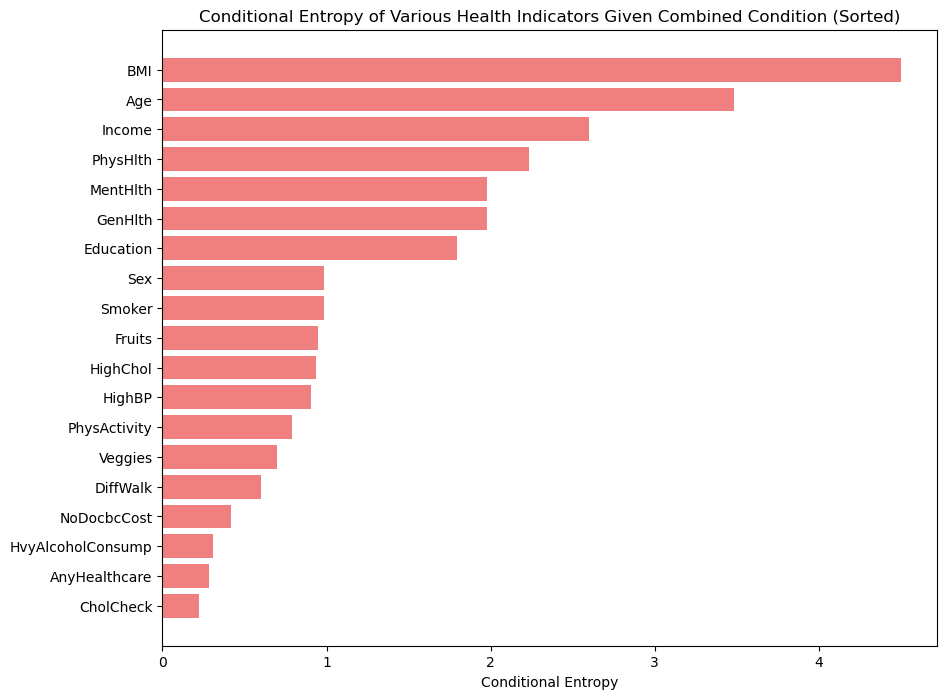

In [80]:

# Create a combined condition variable
HD_data['CombinedCondition'] = ((HD_data['HeartDiseaseorAttack'] > 0) |
                                (HD_data['Stroke'] > 0) |
                                (HD_data['Diabetes'] > 0)).astype(int)

# Calculate joint and marginal probabilities
def calculate_conditional_entropy(data, x, given_y):
    """Calculate the conditional entropy H(X|Y)."""
    joint_prob = pd.crosstab(data[x], data[given_y], normalize=True)
    marginal_y = data[given_y].value_counts(normalize=True)
    
    # Calculate conditional probabilities P(X|Y)
    conditional_prob = joint_prob.divide(marginal_y, axis=1)
    
    # Calculate conditional entropy H(X|Y)
    log_conditional = np.log2(conditional_prob)
    log_conditional.replace(-np.inf, 0, inplace=True)  # Replace -inf with 0 for log(0)
    conditional_entropy = -(joint_prob * log_conditional).sum().sum()  # Sum over all entries
    
    return conditional_entropy

# Assuming HD_data is already loaded with the correct data and columns
categories = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity', 
              'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
              'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Calculate conditional entropy for all variables given 'CombinedCondition'
conditional_entropy_values = {var: calculate_conditional_entropy(HD_data, var, 'CombinedCondition') for var in categories}

# Sort the conditional entropy values from highest to lowest
sorted_conditional_entropy_values = {k: v for k, v in sorted(conditional_entropy_values.items(), key=lambda item: item[1], reverse=True)}

# Plotting the sorted conditional entropies
plt.figure(figsize=(10, 8))
plt.barh(list(sorted_conditional_entropy_values.keys()), list(sorted_conditional_entropy_values.values()), color='lightcoral')
plt.xlabel('Conditional Entropy')
plt.title('Conditional Entropy of Various Health Indicators Given Combined Condition (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()